<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/07_Regresion_lineal/introduccion_regresion.png?raw=true" alt="Drawing" style="width:1000px;">


# Regresión lineal

La regresión es un método estadístico utilizado para modelizar la relación entre una variable dependiente y una o más variables independientes. El objetivo de la regresión es predecir el valor de la variable dependiente basándose en los valores de las variables independientes.

**Tipos:**

- Regresión lineal: Asume una relación lineal entre las variables dependientes e independientes. Modela la relación mediante una ecuación lineal.

- Regresión no lineal: Se utiliza cuando la relación entre las variables no es lineal. Este tipo puede ajustar un modelo infinitamente complejo a los datos.

- Regresión logística: Se utiliza cuando la variable dependiente es categórica. Se suele utilizar para tareas de clasificación binaria.


Nos vamos a enfocar en un modelo de regresión lineal, donde la fórmula general está dada por:

$$y=\beta_0+\beta_1 x+\varepsilon,$$

donde:

- $y$ (Variable Dependiente): es el valor que queremos predecir o explicar.

- $x$ (Variable Independiente): es la variable que utilizamos para hacer la predicción.

- $\beta_0$ (Intersección): representa el valor de $y$ cuando $x = 0$. Es el punto donde la línea de regresión corta el eje y.

- $\beta_1$ (Pendiente): indica el cambio esperado en $y$ por cada unidad de cambio en $x$. Representa la inclinación de la línea de regresión.

- $\varepsilon$ (Término de Error): Captura la variabilidad de $y$ que no puede explicarse por la relación lineal con $x$. Representa factores no incluidos en el modelo.

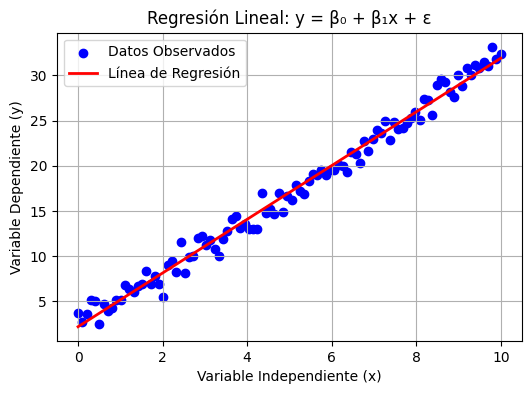

In [3]:
#@title Regresión lineal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)
beta_0 = 2    # Intersección
beta_1 = 3    # Pendiente
epsilon = np.random.normal(0, 1, 100)  # Término de error con distribución normal
x = np.linspace(0, 10, 100) #variable independiente
y = beta_0 + beta_1 * x + epsilon #variable dependiente
x_reshaped = x.reshape(-1, 1)


modelo = LinearRegression()
modelo.fit(x_reshaped, y)

beta_0_est = modelo.intercept_
beta_1_est = modelo.coef_[0]
y_pred = modelo.predict(x_reshaped)


plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue', label='Datos Observados')
plt.plot(x, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Variable Independiente (x)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Regresión Lineal: y = β₀ + β₁x + ε')
plt.legend()
plt.grid(True)
plt.show()

---

_Dataset_

El conjunto de datos de Ruido Propio de Aerofolio está diseñado para analizar y predecir el nivel de ruido generado por aerofolios (superficies aerodinámicas como alas de aviones) bajo diferentes condiciones operativas. Las carcaterísitcas del dataset son:

- Frecuencia: La frecuencia del flujo de aire que incide sobre el aerofolio.

- Ángulo de Ataque: El ángulo entre la cuerda del aerofolio y la dirección del flujo de aire.

- Cuerda: La longitud de la cuerda del aerofolio, es decir, la distancia entre el borde de ataque y el borde de fuga.

- Velocidad: La velocidad del flujo de aire que pasa sobre el aerofolio.

- Succión: El grado de succión aplicado en el aerofolio.

- Nivel de Sonido: El nivel de presión sonora generado por el aerofolio.

---

In [19]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course/')
print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Machine_Learning_Course


In [20]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
import statsmodels.api as sm

In [6]:
d = pd.read_csv("data/airfoil_self_noise.dat.gz")
print (d.shape)
d.head()

(1503, 6)


,freq,angle,chord,vel,suc,pres
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


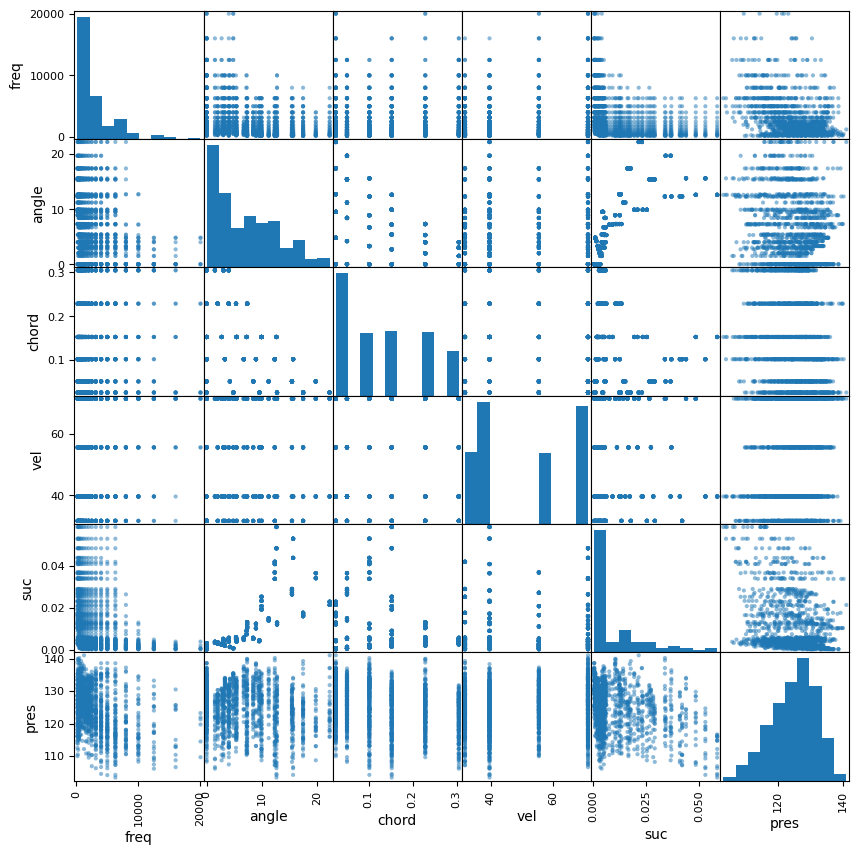

In [7]:
pd.plotting.scatter_matrix(d, figsize=(10,10)); #relacion entre las variables

In [8]:
X = d.values[:,:-1]
y = d.values[:,-1]

In [9]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor()

DecisionTreeRegressor()

`DecisionTreeRegressor()` crea una instancia de un modelo de árbol de decisión para regresión, que utiliza divisiones sucesivas en los datos para predecir valores. Esta estructura permite aprender patrones complejos, dividiendo el conjunto de datos en regiones más pequeñas según las características, facilitando predicciones precisas para variables continuas.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
est = DecisionTreeRegressor(max_depth=20)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error)) #validacion cruzada, usa el error cuadratico medio en cada pliegue
print(s)
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[6.45851597 5.07630193 5.69189037 4.15048819 7.49616431 7.19882201
 7.11416361 4.52226431 4.03093833 5.28262948]
MSE 5.702 (+/- 1.23227)


`SVR()` (Support Vector Regression) es una técnica de regresión basada en máquinas de soporte vectorial (SVM). Busca encontrar una línea (o hiperplano en dimensiones superiores) que ajuste los datos dentro de un margen de tolerancia.

In [11]:
from sklearn.svm import SVR
est = SVR() #modelo de regresión sin parametros personalizados
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 39.548 (+/- 5.98516)


En este caso al entrenar con menos datos, como es el caso de SVR, el rendimiento decae, lo vemos reflejado en un aumento del MSE

In [12]:
#Se divide manualmente el conjunto de datos en un 80% para entrenamiento y un 20% para prueba
n = int(len(d)*0.8)
est = DecisionTreeRegressor()
perm = np.random.permutation(len(d))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print ("MSE %.3f"% mean_squared_error(yts, est.predict(Xts)))

MSE 9.051


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

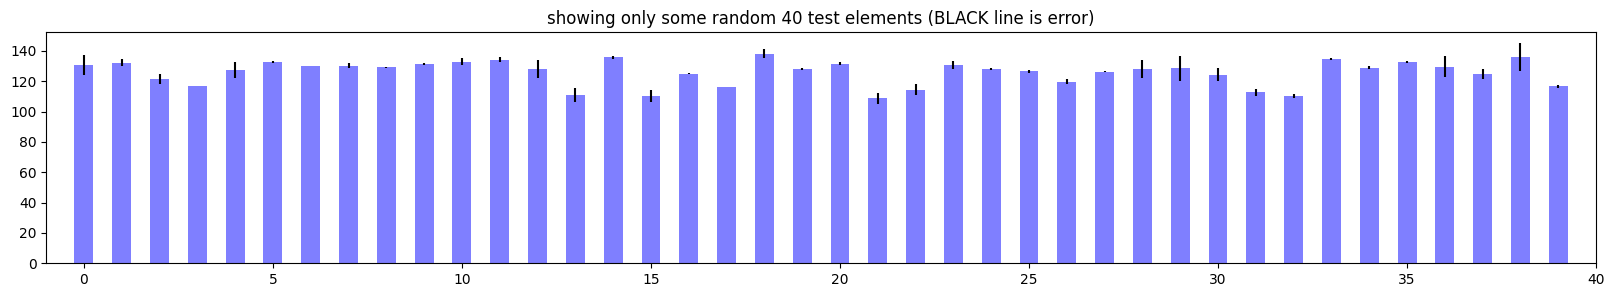

In [13]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

Por último, veamos el efecto de aumentar los datos o el número de "pliegues"

In [14]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

Al ejecutar esta función con un modelo específico, se obtiene un gráfico que muestra cómo varía el rendimiento del modelo (medido como el error cuadrático medio) con diferentes números de pliegues en la validación cruzada. La línea negra representará el rendimiento promedio, mientras que el área azul representará la variabilidad del rendimiento.

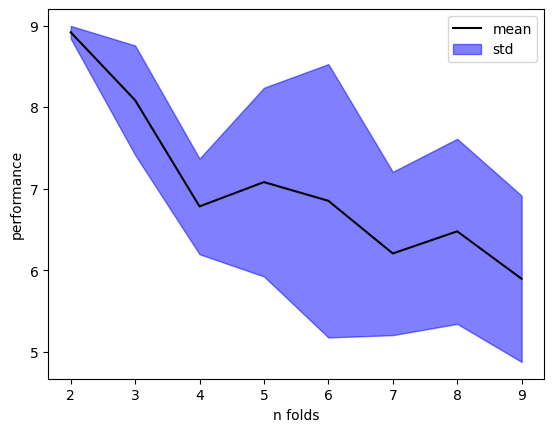

In [15]:
show_curve(DecisionTreeRegressor())

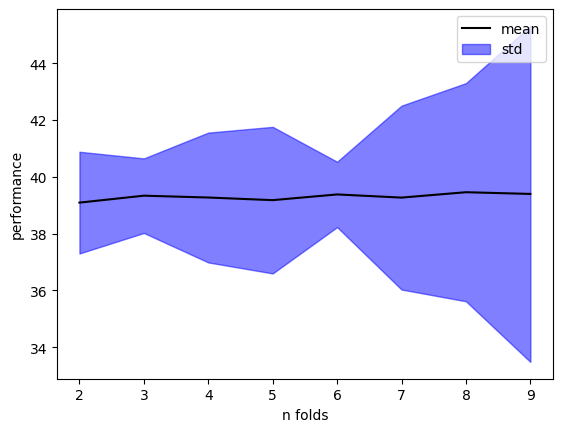

In [16]:
show_curve(SVR())

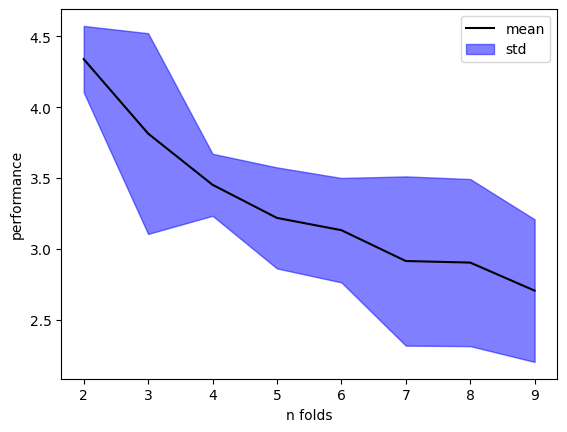

In [17]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

# Regresión lineal simple

La regresión lineal simple es una técnica estadística utilizada para modelar la relación entre dos variables: una variable independiente (predictora) y una variable dependiente (objetivo). Siendo de la forma:

$$y=\beta_0+\beta_1 x+\varepsilon.$$

                            OLS Regression Results                            
Dep. Variable:                  angle   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1970.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          1.47e-275
Time:                        18:18:52   Log-Likelihood:                -4174.5
No. Observations:                1503   AIC:                             8353.
Df Residuals:                    1501   BIC:                             8364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.132     22.833      0.0

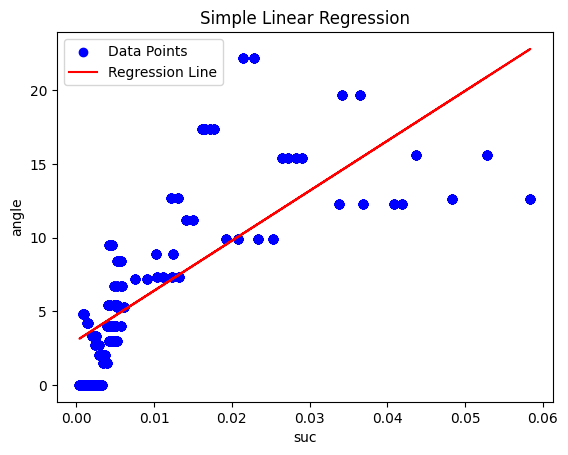

In [18]:
X_simple = sm.add_constant(d['suc'])  # Add a constant for the intercept
y = d['angle']

model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())

# Plotting the results
plt.scatter(d['suc'], y, color='blue', label='Data Points')
plt.plot(d['suc'], model_simple.predict(X_simple), color='red', label='Regression Line')
plt.xlabel('suc')
plt.ylabel('angle')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

En estos resultados se muestran distintas estadisticas del modelo:

### Estadisticas del modelo


<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/07_Regresion_lineal/estadisticas_modelo.png?raw=true" alt="Drawing" style="width:500px;">



- **R-cuadrado ($R^2$)**: La proporción de la variación en la variable dependiente que es predecible a partir de las variables independientes. Un valor cercano a 1 indica que el modelo explica una gran parte de la variabilidad.

  → En este análisis aproximadamente el 56.8% de la variabilidad en la variable dependiente (`angle`) se puede explicar por la variable independiente (`suc`). Esto sugiere una relación moderada entre las dos variables.

- **R-cuadrado ajustado ($R^2$ ajustado)**: Una versión ajustada de $R^2$ que tiene en cuenta el número de predictores en el modelo.

  → Dado que solo se está utilizando una variable independiente, el $R^2$ ajustado es casi igual al $R^2$, lo que es típico en modelos simples.

- **Estadística F**: Una prueba que evalúa si al menos uno de los coeficientes de las variables independientes es significativamente diferente de cero.

  → Un valor alto de F indica que el modelo es significativo y sugiere que hay una relación lineal entre `suc` y `angle`. Esto se complementa con el valor de \( p \) asociado.

### Coeficientes del modelo

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/07_Regresion_lineal/Coeficientes_modelo.png?raw=true" alt="Drawing" style="width:500px;">



- **Intercepto (const)**: 3.0052 → Cuando `suc` es cero, se espera que `angle` sea aproximadamente 3.0052.

- **Pendiente (suc)**:  339.0571 → Por cada unidad de incremento en `suc`, se espera que `angle` aumente en aproximadamente 339.0571, indicando una relación positiva fuerte entre las variables.

### Errores Estándar, Valores t y Valores p
- **Errores Estándar**: Miden la precisión de las estimaciones de los coeficientes. Errores estándar pequeños indican estimaciones precisas.
- **Valores t**: Se utilizan para probar si los coeficientes son significativamente diferentes de cero. Valores absolutos altos sugieren significancia.
- **Valores p**: Indican la probabilidad de observar un valor t tan extremo si el coeficiente fuera realmente cero. Valores p menores a 0.05 generalmente se consideran significativos.

### Intervalos de Confianza
Los intervalos de confianza al 95% proporcionan un rango dentro del cual se espera que se encuentre el verdadero valor del coeficiente. Si el intervalo no incluye cero, se considera que el coeficiente es estadísticamente significativo.



### Diagnósticos de Residuos

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/07_Regresion_lineal/diagnosticos_residuos.png?raw=true" alt="Drawing" style="width:500px;">

Estos diagnósticos ayudan a evaluar si se cumplen los supuestos de la regresión lineal, como la normalidad de los residuos y la ausencia de autocorrelación.

- **Pruebas de Normalidad (Omnibus y Jarque-Bera)**: Verifican si los residuos siguen una distribución normal.
- **Asimetría y Kurtosis**: Proporcionan información sobre la forma de la distribución de los residuos.
- **Durbin-Watson**: Detecta autocorrelación en los residuos. Valores cercanos a 2 indican ausencia de autocorrelación.
- **Número de Condición**: Evalúa la multicolinealidad. Valores altos indican posibles problemas con la relación entre las variables independientes.

---

# Regresión lineal múltiple

La regresión lineal múltiple es una extensión de la regresión lineal simple que permite modelar la relación entre una variable dependiente y dos o más variables independientes. Es de la forma:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \varepsilon,$$

de modo que algunas diferencias con la regresión lineal simple corresponden a:

- Número de Variables Independientes: Mientras que la regresión lineal simple utiliza una sola variable independiente, la regresión lineal múltiple emplea dos o más.

- Complejidad: La regresión múltiple es más compleja y permite capturar relaciones más ricas y realistas entre variables.

- Interpretación: La interpretación de los coeficientes requiere considerar el efecto de todas las demás variables en el modelo.

In [28]:
# Multiple Linear Regression
X_multi = sm.add_constant(d[['freq', 'pres', 'chord', 'vel', 'angle']])  # Adding a constant
y = d['suc']

model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                    suc   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     507.5
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          4.20e-319
Time:                        19:30:50   Log-Likelihood:                 5122.8
No. Observations:                1503   AIC:                        -1.023e+04
Df Residuals:                    1497   BIC:                        -1.020e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0508      0.006      8.990      0.0

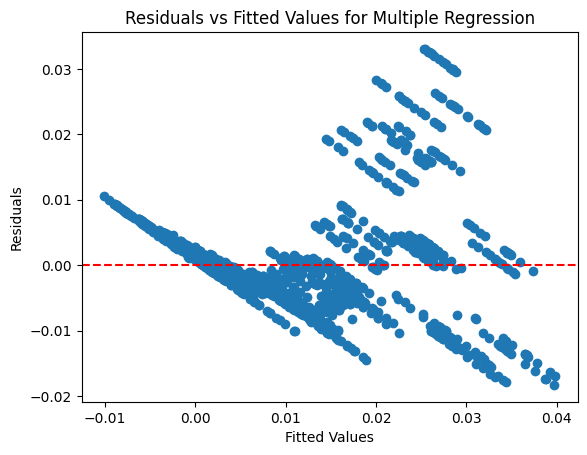

In [29]:
# Residuals plot for multiple regression
residuals_multi = model_multi.resid
plt.scatter(model_multi.fittedvalues, residuals_multi)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Multiple Regression')
plt.show()


### **Diagnósticos de Residuos vs. Valores Ajustados**

#### **Propósito del Gráfico:**

- **Residuos:** Son las diferencias entre los valores observados y los valores predichos por el modelo. Representan una medida de qué tan bien el modelo captura los datos. Idealmente, los residuos deberían dispersarse aleatoriamente alrededor de cero.

- **Valores Ajustados:** Son los valores predichos generados por el modelo. Representan la mejor estimación de la variable dependiente basada en la ecuación de regresión.

#### **Qué Buscar:**

- **Dispersión Aleatoria:** El aspecto más crucial a observar es una dispersión aleatoria de los residuos alrededor de la línea horizontal en cero. Esto indica que las predicciones del modelo no están sesgadas y que el supuesto de linealidad se cumple.

- **Ausencia de Patrones o Estructuras Sistemáticas:** Si los residuos muestran un patrón (por ejemplo, curvaturas, forma de embudo, tendencias ascendentes o descendentes), esto puede indicar problemas como no linealidad, heterocedasticidad o autocorrelación.

  - **Patrones Curvos:** Sugieren que un modelo lineal no es apropiado y que quizás un modelo no lineal se ajustaría mejor a los datos.
  
  - **Formas de Embudo:** Donde los residuos se dispersan a medida que aumentan o disminuyen los valores ajustados, sugieren heterocedasticidad, lo que significa que la varianza de los errores no es constante a lo largo de todos los niveles de las variables independientes.
  
  - **Clústeres o Rachas:** Podrían indicar que existe un efecto de grupo o autocorrelación que el modelo no ha tenido en cuenta.

#### **Interpretación de Ejemplo:**

- **Residuos Dispersos Uniformemente:** Si los residuos están dispersos de manera uniforme a lo largo del rango de los valores ajustados sin ningún patrón discernible, esto sugiere que es probable que se cumplan los supuestos del modelo. Indica que el modelo está capturando adecuadamente la relación entre las variables independientes y la variable dependiente.

- **Patrones Claros en los Residuos:** Por el contrario, si se observan patrones claros en los residuos, esto puede ser una señal para revisar la forma del modelo, considerar transformaciones de los datos o incluir variables adicionales o términos de interacción para capturar mejor los fenómenos subyacentes.

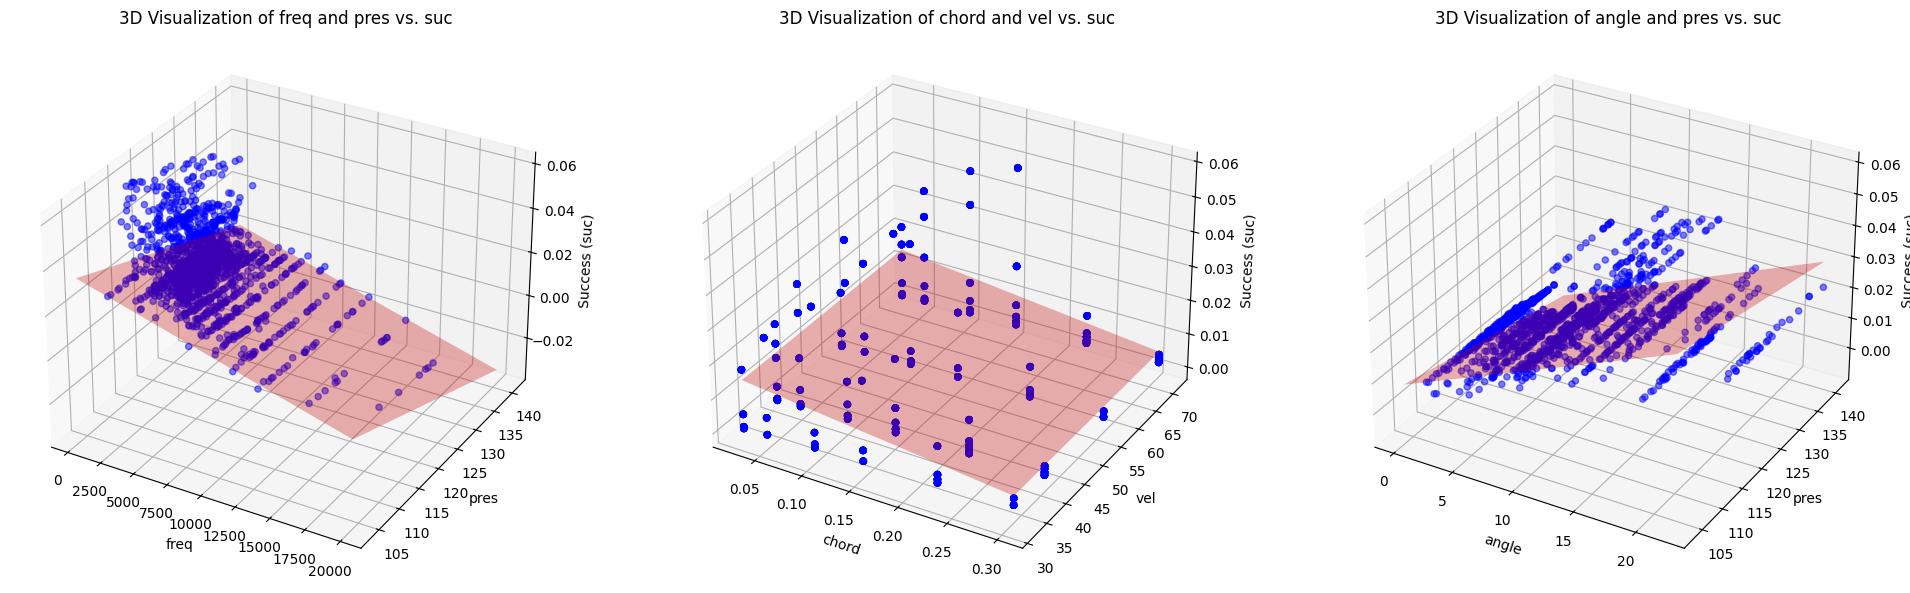

In [35]:
#@title Gráficos en 3D

#'d' es tu DataFrame que contiene las columnas 'freq', 'pres', 'chord', 'vel', 'angle', y 'suc'.

# Definición de las combinaciones de variables para cada subplot
variables = [
    ('freq', 'pres'),  # Primer subplot: freq y pres
    ('chord', 'vel'),  # Segundo subplot: chord y vel
    ('angle', 'pres')  # Tercer subplot: angle y pres
]

fig = plt.figure(figsize=(20, 6))

# Iterar sobre las combinaciones de variables para crear subplots
for i, (var1, var2) in enumerate(variables):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')  # 1 fila, 3 columnas

    # Ajustar el modelo de regresión lineal
    X_multi = sm.add_constant(d[[var1, var2]])
    y = d['suc']
    model_multi = sm.OLS(y, X_multi).fit()

    # Crear una malla de valores para las variables
    var1_range = np.linspace(d[var1].min(), d[var1].max(), 100)
    var2_range = np.linspace(d[var2].min(), d[var2].max(), 100)
    var1_grid, var2_grid = np.meshgrid(var1_range, var2_range)

    # Predecir 'suc' usando la malla de valores
    X_new = sm.add_constant(np.column_stack((var1_grid.ravel(), var2_grid.ravel())))
    suc_pred = model_multi.predict(X_new).reshape(var1_grid.shape)

    # Gráfico de superficie
    ax.plot_surface(var1_grid, var2_grid, suc_pred, alpha=0.3, rstride=100, cstride=100, color='red')

    # Gráfico de dispersión de los datos originales
    ax.scatter(d[var1], d[var2], d['suc'], color='blue', s=20, label='Data Points', alpha=0.5)

    # Etiquetas y título para cada subplot
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel('Success (suc)')
    ax.set_title(f'3D Visualization of {var1} and {var2} vs. suc')

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


# References

[1] airfoil self-noise: https://www.neuraldesigner.com/learning/examples/airfoil_self_noise_prediction

[2] Metrics in regression: https://www.kaggle.com/learn-forum/52081



<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/01_introduccion_python/programando_sin_barreras.jpeg?raw=true" alt="Drawing" style="width:1000px;">